# Data Parsing and Exploratory Analysis
Jana Bruses | janabruses@pitt.edu | University of Pittsburgh | Feb. 23rd - Mar. 21st 2025

## 1. A few data considerations
Citing Montoya Abat and Mas I Miralles’ notes in Linguistic Variation, “written language always represents a later stage than the actual appearance of any linguistic phenomenon, since the written text incorporates innovations when in oral expression they have already been occurring for some time.” They further add that in written language, “the appearance of occurrences tends to be considerably reduced.” That is because standardization tends to substantially influence written language more, particularly in literary works, which go through multiple reviews before publication.

In this regard, since we are examining language variation, spoken data would likely provide the best approach for identifying traces of Catalan’s substitution. However, as we need our data to span a sufficiently long timeframe to capture changes and differences, finding open-spoken resources from earlier periods is highly challenging. Therefore, we will work with the closest approximation to spoken data: transcribed speeches, plenary sessions, and other written records derived from spoken works.

Not finding a Catalan corpora covering a timespan over 15 years. We will be using multiple corpora that fulfill the points mentioned above. 

In chronological order, these are:

1) **CTIC(1832-1926)**\
Corpora originally contained texts published between 1832 and 1988 and expanded to recent works after 2015. Created to develop the descriptive dictionary of the Catalan language known as DDLC. Part of the corpora has been made available for public use. Only those works that are no longer subject to copyright in Spain are being made public work by work in single text files.\
The downloadable corpora consists of 337 files of literary works and 596 non-literary texts, all published before 1985.\
Out of these works, we’ll be using 28 speech-delivered texts, specifically speeches.

2) **Parlament Parla (2007-2018)**\
Speech corpus by Col·lectivaT containing Catalan Parliament (Parlament de Catalunya) plenary sessions from 2007 to 2018.\
Transcriptions have been aligned with the recordings and the corpora extracted.\
Corpora comprises 211 hours of clean and 400 hours of other quality segments, where each speech segment is tagged with its speaker the speaker’s gender.

3) **ParlaMint-ES-CT (2015-2022)**\
ParlaMint-ES-CT is the Spanish and Catalan parliamentary corpora covering from 2015 to 2022 as part of the corpora project ParlaMint: Comparable Parliamentary Corpora. The full corpora contains compiled subcorpora from 29 countries and autonomous regions in original languages, as well as machine translations to English.

4) **Radioteca.cat**\
TBD\
Library of over 300.000 IA-transcribed radio programs and summaries.
It would need to be web-scraped, and permission would need to be asked for.

***If Radioteca.cat does not work:***\
Unfortunately, identifying a publicly available corpus covering the period between 1985 and 2007 that meets our criteria of being as close to spoken data as possible wasn't possible. This gap poses a challenge, as linguistic changes occurring during these two decades may be underrepresented in our analysis. However, we mitigate this by focusing on corpora that maintain a consistent genre—spoken or speech-derived texts—ensuring comparability across different time periods.

## 2. Data processing

The data processing procedure for each of the corpora in chronological order follows:\
Each corpus is processed and analyzed through a general Exploratory Data Analysis using the following function and then through corpora-specific analysis.\
Then, the corpora are assembled all together with section [2.5](#2.5-Jointly), where all the data is put together and explored in an overall EDA. 

**2.1** [CTILC](#2.1-CTILC)\
**2.2** [Parlament Parla](#2.2-Parlament-Parla)\
**2.3** [ParlaMint](#2.3-ParlaMint-ES-CT)\
**2.4** [Radioteca](#2.4-Radioteca.cat)\
**2.5** [All data jointly](#2.5-Jointly)

In [27]:
def generalEDA(dataframe, corpus_name):
    '''
    Function to run general Exploration Data Analysis
    Takes in the pandas dataframe and its name
    Prints out its:
        shape
        info
        column names
        corpora length
        timeframe (if time metadata is avaliable)
        description     
        timeline visualization (if time metadata is avaliable) 
    '''
    print("--- EDA", corpus_name, "---")
    print("The dataframe has:",
          dataframe.shape[0], "rows",
          dataframe.shape[1], "columns", "\n")
    print("Dataframe's info is:")
    print(dataframe.info(), "\n")
    print("The Dataframe's", len(dataframe.columns), "columns are:", "\n", dataframe.columns, "\n")
    dataframe["Text_len"] = dataframe["Text"].apply(len)
    print("The total length of the Dataframe excluding the metadata is:", "\n", dataframe["Text_len"].sum(), "\n")
    key_word = None
    if "Date" in dataframe.columns:
        key_word = "Date" # for plotting later
        print("The data ranges from", dataframe["Date"].min(), "to", dataframe["Date"].max(), "\n")
    if "Year" in dataframe.columns:
        key_word = "Year" # for plotting later
        print("The data ranges from", dataframe["Year"].min(), "to", dataframe["Year"].max(), "\n")
    print("The description of the dataframe is:", "\n",
          dataframe.describe(), "\n", "\n")

    if key_word:
        # extacting unique years and sorting them
        if corpus_name == "ParlaMint":
            years = sorted((parlaMint_df[key_word].apply(lambda x :x[0:7])).unique())
        if corpus_name == "Radioteca.cat":
            years = sorted((radioteca_df_complete["Date"].unique()))
        if corpus_name == "CTILC": 
            years = sorted(CTILC_df[key_word].unique())
        

        # create place holder for y-values 
        y_values = [1] * len(years)  # Place all points at y=1

        # Plot each year as a point on the timeline
        fig, ax = plt.subplots(figsize=(12, 2)) 
        ax.scatter(years, y_values, color="blue", marker="o")

        # formatting
        ax.set_xlabel(key_word)
        ax.set_yticks([])  
        ax.set_title("Document Timeline")
        ax.grid(axis="x") 
        plt.xticks(rotation=90)

        plt.show()

### 2.1 CTILC

The files are .txt, so we will parse them using plain text corpus reader.\
Their encoding is UTF-8 with FL line terminator, so they align with our encoding and line termination preference.\
No changes are required.

In [9]:
#importing nltk's plain text corpus reader
from nltk.corpus.reader import PlaintextCorpusReader

corpus_root = 'data/CTILC/tots'
corpus = PlaintextCorpusReader(corpus_root, r'.*\.txt')

#print(corpus.fileids())  # getting filenames to get a file
print(corpus.raw('001858_Discurs_llegit_en_lo_Certamen_Catalanist.out.txt')[:1000])  # taking a look at part of one of the files

<DOCUMENT>
<OBRA id="1858">
<AUTOR>Sagarra i de Siscar, Ferran de</AUTOR>
<TÍTOL>Discurs llegit en lo Certamen Catalanista de la Joventut Católica de Barcelona</TÍTOL>
<ANY>1891</ANY>
<CLASSIFICACIÓ_TEXTUAL llengua="NLIT" gènere="" tema="2" subtema="2.7" traducció="no" variant="central" />
</OBRA>
<TEXT>Discurs llegit en lo certamen catalanista de la joventut católica de Barcelona

Excm. é Ilm. Sr. Senyors: Quan en Bonaventura Carles Aribau, al començarse lo segon terç de la presént centuria, ab aquell Adéu á la patria, plé de sentiment y tendresa, y ab aquell recort per la llengua en que soná son primer vagit quan del mugró matern la dolça llet bebia, iniciava lo modern renaxement de nostra literatura, ¿qui ho havia de dir, que en breu espay de temps, poetas y prosadors conqueririan tants llors pera les lletres catalanes? Y ab tot, no sols fou axí, sino que ab la remembrança de antigues gestes, al fer reviure grans homens y fets del llibre d' or de nostra historia, se despertá en nosa

In [3]:
# there is some metadata mixed which might actually be very useful
# so we will change the approach and parse the CTILC data as an xml and store it as a pandas dataframe
# where the id, author, title, date and other metadata will be strored in columns
# the text will have its own column

In [10]:
#importing BS, Pandas, NumPy (for NaN values) and Regex
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

CTILC_data = []

for file in corpus.fileids():   
    soup = BeautifulSoup(corpus.raw(file), 'html.parser')
    data = {}  # dictionary for each file

    # "obra" ID (CAT) / work ID (ENG) - we will use ID for short
    obra_tag = soup.find("obra") 
    data["ID"] = obra_tag["id"] if obra_tag and obra_tag.has_attr("id") else np.nan 

    # "autor" (CAT) / Author (ENG) 
    data["Author"] = soup.find("autor").text if soup.find("autor") else np.nan

    # "títol" (CAT) / Title (ENG)
    data["Title"] = soup.find("títol").text if soup.find("títol") else np.nan

    # "any" (CAT) / Year (ENG)
    data["Year"] = soup.find("any").text if soup.find("any") else np.nan

    # "text" (CAT) / "Text" (ENG) - where we will store the content of the files, the non-metadata, the meat
    data["Text"] = soup.find("text").text if soup.find("text") else np.nan
    #in the text the title begins the content, we will get rid of it as we can find a "\n\n" separator between the title and the content
    data["Text"] = re.sub(r".*?\n\n(?=\S)", "", data["Text"], count = 1, flags=re.DOTALL)

    CTILC_data.append(data)

# creating Pandas df
CTILC_df = pd.DataFrame(CTILC_data)

#taking a look at the head of the CTILC data frame
CTILC_df.head()

,ID,Author,Title,Year,Text
0,766,"Serra i Pagès, Rossend",Discurs llegit per... donar a conèxer la perso...,1926,"L'home que per amor al estudi, impulsat per un..."
1,1100,"Millet i Pagès, Lluís",Parlament llegit en la festa inaugural de l'Or...,1920,"Cantaires de la Garriga, Senyores i senyors:\n..."
2,1664,"Miró i Borràs, Oleguer",Discurs-pròlec,1900,Discurs-prolec Llegit en la societat mèdic-far...
3,1784,"Balari i Jovany, Josep",Discurs,1894,"Senyors excelentissims, senyors:\n\nQuan rebí ..."
4,1820,"Torras i Ferreri, Cèsar August",Discurs,1903,"Senyors:\n\nSembla que era air, y fa ja uns qu..."


--- EDA CTILC ---
The dataframe has: 28 rows 5 columns 

Dataframe's info is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      28 non-null     object
 1   Author  28 non-null     object
 2   Title   28 non-null     object
 3   Year    28 non-null     object
 4   Text    28 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB
None 

The Dataframe's 5 columns are: 
 Index(['ID', 'Author', 'Title', 'Year', 'Text'], dtype='object') 

The total length of the Dataframe excluding the metadata is: 
 721938 

The data ranges from 1860 to 1926 

The description of the dataframe is: 
            Text_len
count     28.000000
mean   25783.500000
std    14946.550472
min     9178.000000
25%    15676.500000
50%    21784.000000
75%    32158.750000
max    73881.000000 
 



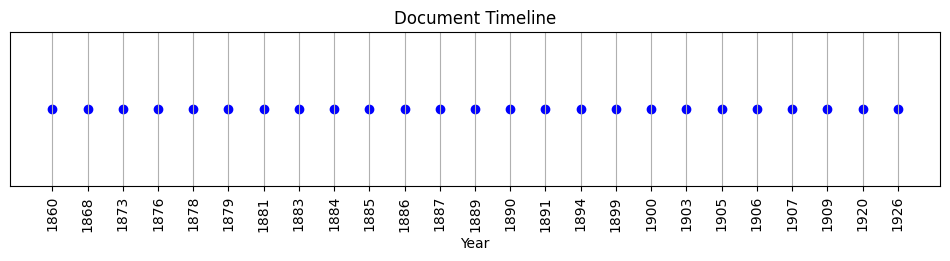

In [11]:
import matplotlib.pyplot as plt

generalEDA(CTILC_df, "CTILC")

In [12]:
# other EDA
print()
print(CTILC_df["Author"].value_counts()[0:5])
print()
CTILC_df["Decade"] = CTILC_df["Year"].apply(lambda x :x[-2]+"0")
CTILC_df["Decade"].value_counts()


Author
Serra i Pagès, Rossend               2
Monserdà, Dolors                     2
Querol i Campos, Vicent Wenceslau    1
Picó i Campamar, Ramon               1
Ubach i Vinyeta, Francesc            1
Name: count, dtype: int64



Decade
80    8
00    6
90    5
70    5
20    2
60    2
Name: count, dtype: int64

**Exploratory Analysis Summary:**\
After parsing the data and turining it into a pandas data frame, the CLTIC data frame has 5 columns.\
Out of the 5, four of the columns correspond to the metadata, specifically the works' ID, the author of the text, its title and year of publication.\
The fifth column is the content of the work, in other words the text.\
The oldest work from the CLTIC copora is from 1860, and the most recent from 1926.\
The total length, and hence the amount of data we have in total from the CLTIC corpora is about 700,000 word tokens.\
These come from different length texts, as we find that the shortest participates to the total with over 9,000 word tokens, and the longest with about 70,000 word tokens.\
The average length of the 28 texts our subset of the corpora contains is about 25,000 tokens per text.\
Covering the over 65 years time-span the texts are not evenly spread. We find a bigger representation of the years closer to the century change. As the 1880s and the 1900s are the 2 most represented centuries in that order. Followed by the 1890s and 1870s, which both are represented with 5 texts. The 1860s and 1920s, the two ends of the time-span are the least represented with 2 texts each. Not represented at all we find the 1910s. However, as we see in the timeline plot many of the 1900s texts are from the late 1900s, including texts from the 1907 and 1909. It is descently spread and gives us descent coverage of the time-span.\
The maximum amount of texts included in the corpora written by the same author is at a maximum of two, and just for two authors, which allows us to make inferences without being tripped by the specific authors' styles, or having a same style and author influence or become a bias of the time-span's data. 

### 2.2 Parlament Parla

The files are .tsv, so we will parse them using Pandas.\
Their encoding is UTF-8 but CRFL line terminators, that were converted to FL line terminators using dos2unix on terminal.

In [13]:
# loading data and creating a Pandas dataframe:

In [14]:
def partition_reading(path):
    '''
    Function takes in a path and returns a dataframe containing:
        1) the content of the tsv file
        2) a column with the partition extracted from the 4th to 15th character of the path starting from the back
    '''
    df = pd.read_csv(path,  sep='\t', header = 0)
    df["Partition"] = path[-15:-4]
    return df

In [15]:
# importing os
import os
#corpus_root = 'dataCAT/ParlamentParla'

#reading in each of the partitions and turning them into separate data frames
clean_tr = partition_reading("data/ParlamentParla/clean_train.tsv")
clean_dev = partition_reading("data/ParlamentParla/clean_dev.tsv")
clean_ts = partition_reading("data/ParlamentParla/clean_test.tsv")
#other_tr = pd.read_csv('dataCAT/ParlamentParla/other_train.tsv')
other_dev = partition_reading("data/ParlamentParla/other_dev.tsv")
other_ts = partition_reading("data/ParlamentParla/other_test.tsv")

#merging data frames in a single dataframe through concatenation
parlament_parla_df = pd.concat([clean_tr, clean_dev, clean_ts, other_dev, other_ts]) #other_tr missing
parlament_parla_df.columns = ["Speaker_id", "Path", "Text", "Gender", "Duration", "Partition"]

#taking a look at part of the dataframe
parlament_parla_df.head()

,Speaker_id,Path,Text,Gender,Duration,Partition
0,164,clean_train/3/1/31ca4d158eaef166c37a_18.87_23....,perquè que el president de catalunya sigui reb...,M,4.71,clean_train
1,164,clean_train/3/1/31ca4d158eaef166c37a_60.13_65....,que lliga absolutament amb allò que vostè diu ...,M,5.50,clean_train
2,336,clean_train/2/8/2803008bb00cb0c86de6_17.0_30.1...,gràcies presidenta consellera atès l'inici del...,M,13.15,clean_train
3,336,clean_train/2/8/2803008bb00cb0c86de6_31.03_44....,li volem preguntar si el seu departament té pr...,M,13.02,clean_train
4,336,clean_train/2/8/2803008bb00cb0c86de6_44.74_53....,per tal d'iniciar la recuperació de l'ensenyam...,M,8.49,clean_train


In [72]:
generalEDA(parlament_parla_df, "Parlament Parla")

--- EDA Parlament Parla ---
The dataframe has: 87424 rows 6 columns 

Dataframe's info is:
<class 'pandas.core.frame.DataFrame'>
Index: 87424 entries, 0 to 1898
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Speaker_id  87424 non-null  int64  
 1   Path        87424 non-null  object 
 2   Text        87424 non-null  object 
 3   Gender      87424 non-null  object 
 4   Duration    87424 non-null  float64
 5   Partition   87424 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.7+ MB
None 

The Dataframe's 6 columns are: 
 Index(['Speaker_id', 'Path', 'Text', 'Gender', 'Duration', 'Partition'], dtype='object') 

The total length of the Dataframe excluding the metadata is: 
 13174757 

The description of the dataframe is: 
          Speaker_id      Duration      Text_len
count  87424.000000  87424.000000  87424.000000
mean     184.029866      9.135149    150.699545
std      104.624795      3.26

In [16]:
# dataframe-specific EDA
print(parlament_parla_df["Gender"].value_counts())
print()

Gender
M    53220
F    34204
Name: count, dtype: int64



**Exploratory Analysis Summary:**\
After parsing the data and turining it into a pandas dataframe, the Parlament Parla data frame has 6 columns.\
Out of the 6, five of the columns correspond to the metadata. Provided by the resource itself we find 4 metadata columns: the speaker id, the path of the corresponding sound, the gender of the speaker and the duration of the audio file the transcription corresponds to. Also as metadata, we find the column previously created identifying what partition of the data the audio file content belongs to, te partitions being defined by the folders and then stored as variables in the "Partiction" column of the dataframe.\
The third column, and only non-metadata one, adding up to the 6 total is the transcription of the content of the audio file.\
There is no metadata on when the recording was done nor transcribed.\
The total length, and hence the amount of data we have in total from the Parlament Parla corpora is about 10,000,000 word tokens.\
The transcription that contributes with the least amount of data is only 7 word tokens long, while the longest is about 670 word tokens.\
The average length of the over 87,000 transcriptions is about 150 tokens per transcription.\
The genders are not evenly represented on the corpora, but close enough that it shouldn't pose a problem. as both are represented about 10,000 transcriptions off of 40,000 transcriptions.
While it is

### 2.3 ParlaMint-ES-CT

Files are in multiple formats.\
To be consistent with the other datasets, which are less flexible, we'll use:
* tsv documents for the metadata
* txt documents for the text content/transcription

In [17]:
#ParlaMint part 1 - Metadata/tsv
import glob

# defining the path where ParlaMint data is stored
data_path = "data/ParlaMint-ES-CT.ana/ParlaMint-ES-CT.txt"  # Adjust to your directory

# loading all metadata/.tsv files
metadata_files = glob.glob(os.path.join(data_path, "**", "*-meta.tsv"))

# reading in and concatenating all metadata files
metadata = []
for file in metadata_files:
    meta_df = pd.read_csv(file, sep="\t", index_col = False)
    metadata.append(meta_df)

metadata_df = pd.concat(metadata)

# taking a quick look at the metadata dataframe
metadata_df.head()

,Text_ID,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,...,Speaker_MP,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth
0,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.1.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970
1,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.224.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,MP,notMinister,GP-ERC,Grup Parlamentari Esquerra Republicana de Cata...,Coalition,Entre centreesquerra i esquerra,VilaltaMarta,"Vilalta i Torres, Marta",F,1984
2,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.2.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970
3,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.3.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,Minister,ERC,Esquerra Republicana de Catalunya,-,Entre centreesquerra i esquerra,VilagràLaura,"Vilagrà Pons, Laura",F,1976
4,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.4.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970


In [18]:
#ParlaMint part 2 - txt/content

# loading all text files
text_files = glob.glob(os.path.join(data_path, "**", "*.txt"), recursive=True)

# reading in and concatenating all text files
text_list = []
for file in text_files:
    if "README" not in file: # avoiding the README.txt getting mixed up with our data
        text_df = pd.read_csv(file, sep="\t", header = None)
        text_list.append(text_df)

text_df = pd.concat(text_list)

# giving name columns ID and Text to the dataframe columns
text_df = text_df.rename(columns ={0: "ID", 1:"Text"})

# taking a quick look at the txt files dataframe
text_df.tail()

,ID,Text
126,ParlaMint-ES-CT_2016-06-09-1802.127.0,"Moltes gràcies, senyor Fernández. A continuaci..."
127,ParlaMint-ES-CT_2016-06-09-1802.128.0,"Gràcies, presidenta. Bon dia. Des de la CUP, e..."
128,ParlaMint-ES-CT_2016-06-09-1802.129.0,"Moltes gràcies, senyora Vehí. A continuació, t..."
129,ParlaMint-ES-CT_2016-06-09-1802.130.0,"Gràcies, presidenta. Vicepresident, consellera..."
130,ParlaMint-ES-CT_2016-06-09-1802.131.0,"Moltes gràcies, senyor Bonvehí. Acabat el deba..."


In [19]:
# let's compare the two data frames text and metadata to see if we can merge them
print("The metadata data frame has the following dimensions:", metadata_df.shape)
print("The text data frame has the following dimensions:", text_df.shape)

The metadata data frame has the following dimensions: (50824, 23)
The text data frame has the following dimensions: (50824, 2)


In [20]:
# the number of rows matches which is a great sign that no data was left behind in the creation of the data frame
# it lets us know that we can merge it by using the file IDs

In [21]:
# merging with ID as index
parlaMint_df = metadata_df.merge(text_df, on="ID", how="outer")

In [22]:
# taking a quick look at the ParlaMint dataframe
parlaMint_df.tail()

,Text_ID,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,...,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth,Text
50819,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.95.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970,"I, finalment, en nom del Grup Mixt, té la para..."
50820,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.96.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-GM,Grup Mixt,-,Entre centredreta i dreta,FernándezAlejandro,"Fernández Álvarez, Alejandro",M,1976,"Gràcies, presidenta. Quan es parla del litoral..."
50821,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.97.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970,"Moltes gràcies. Finalment, per pronunciar-se s..."
50822,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.98.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-CUP,Grup Parlamentari de la Candidatura d'Unitat P...,Opposition,Entre esquerra i extrema esquerra,CornellàDani,"Cornellà Detrell, Dani",M,1978,"Bé, gràcies. Primer de tot, faré una esmena in..."
50823,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.99.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970,"Un moment, diputat. Silenci, si us plau. Deman..."


In [23]:
# re-checking dimensions
print("Both the metadata and text dataframes had the following dimensions:", metadata_df.shape)
print("The merged data frame has the following dimensions:", parlaMint_df.shape)

Both the metadata and text dataframes had the following dimensions: (50824, 23)
The merged data frame has the following dimensions: (50824, 24)


In [24]:
# the dimensions are correct
# there is the same number of rows and the text column has been added to the 23 columns that the metadata dataframe had before

--- EDA ParlaMint ---
The dataframe has: 50824 rows 25 columns 

Dataframe's info is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50824 entries, 0 to 50823
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Text_ID             50824 non-null  object
 1   ID                  50824 non-null  object
 2   Title               50824 non-null  object
 3   Date                50824 non-null  object
 4   Body                50824 non-null  object
 5   Term                50824 non-null  object
 6   Session             50824 non-null  object
 7   Meeting             50824 non-null  int64 
 8   Sitting             50824 non-null  int64 
 9   Agenda              50824 non-null  object
 10  Subcorpus           50824 non-null  object
 11  Lang                50824 non-null  object
 12  Speaker_role        50824 non-null  object
 13  Speaker_MP          50824 non-null  object
 14  Speaker_minister    50824 non-nu

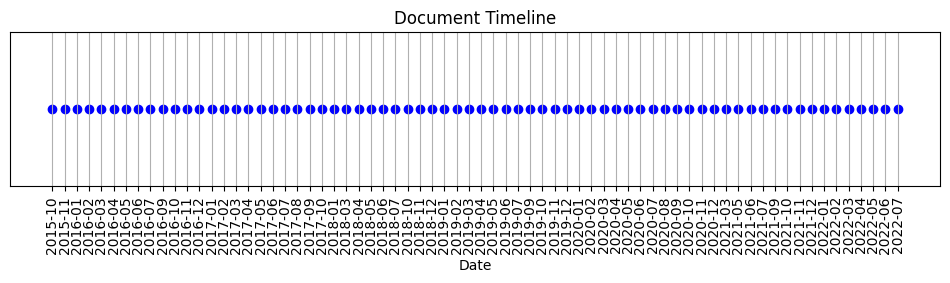

In [28]:
generalEDA(parlaMint_df, "ParlaMint")

In [29]:
# dataframe-specific EDA
print()
print(parlaMint_df["Speaker_gender"].value_counts())
print()
print("The total of speakers is:", len(set(parlaMint_df["Speaker_name"].values)))
print()
print("The transcription count by speaker is:", "\n", parlaMint_df["Speaker_name"].value_counts()[:10])
print()
percentage = (100 * parlaMint_df["Speaker_name"].value_counts().iloc[0]) / parlaMint_df.shape[0]
print("Percentage of the data spoken/recorded from the most frequent speaker on the corpora:", f"{percentage:.2f}%")
print()

# dictionary to store count per year, with year as key
year_count = {}

# setting date as the index of the dataframe
parlaMint_df = parlaMint_df.set_index("Date")

# iterating over the rows 
for date, row in parlaMint_df.iterrows():
    date = date[0:4]
    if date not in year_count:
        year_count[date] = 1  # adding year key to year_count
    else:
        year_count[date] += 1 # adding count to the year_count year

print("Year count sorted by year:", "\n", year_count, "\n")
year_count = sorted(year_count.items(), key=lambda x: x[1], reverse = True)
print("Year count sorted by transcriptions count:", "\n", year_count)
print()

parlaMint_df = parlaMint_df.reset_index() # reseting parlaMint index, so Date is not index anymore

#-----------------------------------------------------------------------------
speaker_toks = {}

# setting speaker as the index of the dataframe
parlaMint_df = parlaMint_df.set_index("Speaker_name")

# iterating over the rows 
for speaker, row in parlaMint_df.iterrows():
    if speaker not in speaker_toks:
        speaker_toks[speaker] = row["Text_len"]  # initializing author's length total
    else:
        speaker_toks[speaker] += row["Text_len"] # accumulating length to already present author

parlaMint_df = parlaMint_df.reset_index() # reseting parlaMint index, so Speaker_name is not index anymore

sorted_speaker_toks = sorted(speaker_toks.items(), key=lambda x: x[1], reverse = True)
top5_speaker_toks = sorted_speaker_toks[:5]
for item in top5_speaker_toks:
    speaker = item[0]
    print(speaker, "-", speaker_toks[speaker])

print()
percentage = (100 * speaker_toks[top5_speaker_toks[0][0]]) / parlaMint_df["Text_len"].sum()

print()
print("Percentage of the data spoken/recorded from the most frequent speaker on the corpora in tokens:", f"{percentage:.2f}%")


Speaker_gender
M    27950
F    22874
Name: count, dtype: int64

The total of speakers is: 348

The transcription count by speaker is: 
 Speaker_name
Torrent i Ramió, Roger            10173
Forcadell i Lluís, Carme           8109
Borràs i Castanyer, Laura          4926
Costa i Rosselló, Josep            1390
Gallego i Herrera, Joan Carles     1079
Carrizosa Torres, Carlos            977
Rodríguez i Serra, Santi            626
Aragonès i Garcia, Pere             616
Fernández Álvarez, Alejandro        547
Torra i Pla, Joaquim                531
Name: count, dtype: int64

Percentage of the data spoken/recorded from the most frequent speaker on the corpora: 20.02%

Year count sorted by year: 
 {'2015': 194, '2016': 7955, '2017': 8055, '2018': 5659, '2019': 10059, '2020': 7304, '2021': 5726, '2022': 5872} 

Year count sorted by transcriptions count: 
 [('2019', 10059), ('2017', 8055), ('2016', 7955), ('2020', 7304), ('2022', 5872), ('2021', 5726), ('2018', 5659), ('2015', 194)]

Torrent i 

**Exploratory Analysis Summary:**\
After parsing the data and turining it into a pandas data frame, the ParlaMint data frame has 24 columns.\
Out of the 24, twenty-three of the columns correspond to the metadata, all extracted from the tsv files. Some examples are the text ID, the role of the speaker, their gender, their year of birth and Language they speak in (relevant when comparing the different languages in the ParlaMint corpora).\
The last column, the 25th is the content/text, the transcription of the plenary session which as been extracted from the txt files and included in the dataframe previously.\
The oldest work from the ParlaMint copora is from October 2015, and the most recent from September 2022.\
The total length, and hence the amount of data we have in total from the ParlaMint corpora is about 90,000,000 word tokens.\
These come from different length texts, as we find that the shortest contributes to the total with 2 word tokens, and the longest with about 100,000 word tokens.\
The average length of the 50824 transcriptions is about 1800 tokens per text.\
The corpora give us information about Catalan through a span of 7 years. All of the seven years are represented in the corpora. However, while in 2019 over 10,000 transcriptions were recorded, in 2015 not even 200 were recorded. That is the exception, however, as the rest of the years, from 2016 to 2019, all are represented with over 5,000 transcriptions.\
Fortunately, the Parlament Parla corpora, previously loaded, contains data from 2007 to 2015 which will make up for this difference.\
The speaker's gender is evenly represented in the corpora, as we find around 2,500 transcriptons for both female and male speakers.\
There speech is from about 350 speakers which allows us to assume our data is not speaker-specific. However, we do note that the most frequent speaker in the corpora contributes to a 20% of the data. Looking at that percentage, it seemed like it could be a problem, as the specific speaker's speech style could be changing our analysis. To be certain about whether most of the data was on their speech or not the percentage was calculated off tokens. As a result we found that only 3.36% of the data recorded was said by the most frequent speaker on the data set, which allows us to conclude it shouldn't be an issue when analyzing the data and drawing conclusions.

### 2.4 Radioteca.cat

In [34]:
from bs4 import BeautifulSoup
import requests

In [35]:
# loading the csv file with the metadata and link to each of the transcriptions
radioteca_df = pd.read_csv("data/TranscripcionsRadioteca.csv", header = 0)

In [36]:
radioteca_df.columns = ["Date", "Publisher", "Program_name", "Title", "URL"]

In [37]:
radioteca_df.head()

,Date,Publisher,Program_name,Title,URL
0,2025-03-09,Cadena SER,Tot és Comèdia,ENTREVISTA. Àngel Duran,https://radioteca.cat/p/tot-es-comedia/2025/03...
1,2025-03-09,RAC1,Viatja Bé - Món natural,Fem una ruta fins al Santuari de Sant Llorenç ...,https://radioteca.cat/p/viatja-be_mon-natural/...
2,2025-03-09,RAC1,Viatja Bé - Descobrim,Sania Jelic viatja sola pel mon contra l'edadisme,https://radioteca.cat/p/viatja-be_descobrim/20...
3,2025-03-09,RAC1,Viatja Bé Hora a Hora,Diumenge 09/03/25 - 15 h,https://radioteca.cat/p/viatja-be_sencer/2025/...
4,2025-03-09,Catalunya Ràdio,En guàrdia!,"Matías Granja, del Pallars a Xile",https://radioteca.cat/p/en-guardia/2025/03/09/...


In [38]:
radioteca_df["Date"] = pd.to_datetime(radioteca_df['Date'], errors='coerce')
radioteca_df["Year"] = radioteca_df['Date'].dt.year
item =(radioteca_df[pd.isnull(radioteca_df["Date"]) == True]).index # it's just one row so we'll just drop that one
print(item)
radioteca_df = radioteca_df.drop(item)

Index([363678], dtype='int64')


In [39]:
radioteca_df = radioteca_df.set_index("URL")

In [40]:
# sample radioteca HTML content
html_content = '''
<div class="transcript-segment">
    <div class="transcript-speaker">
        <span style="color:#aaffc3">Veu E</span>
        <span class="transcript-time">00:00:04</span>
    </div>
    <p class="transcript-text">Tot és comèdia. Màxim Castillo.</p>
</div>
'''

In [41]:
# to avoid requesting session every time which makes us o waaay slower
session = requests.Session()

def scrape_radiotecafile(file):
    response = session.get(url)
    if response.status_code != 200:  # Check for successful response
        print(f"Failed to fetch {url}")
        return None
    
    soup = BeautifulSoup(response.text, 'html.parser')
    transcript_section = soup.find("div", class_="transcript-container")
    content = {}


    if transcript_section:
        for segment in transcript_section.find_all("div", class_="transcript-segment"):
            # get the text of the transcipt
            segment_text = segment.get_text(strip=True)
            
            # extracting the line_id (speaker+time), speaker, time and the text
            if segment.find("p", class_="transcript-text"):
                line_id = segment.find("div", class_="transcript-speaker").get_text(strip=True)
                speaker = line_id[:5]
                time = segment.find("span", class_="transcript-time").get_text(strip=True)
                text = segment.find("p", class_="transcript-text").get_text(strip=True)

                # getting metadata
                metadata = radioteca_df.loc[url]
                content[line_id] = [speaker, time, text, metadata['Date'], metadata['Publisher'], metadata['Program_name'], metadata['Title'], url, metadata['Year']]
                
    return content

In [42]:
radioteca_df = radioteca_df[radioteca_df["Year"] <= 2010]

In [283]:
#radioteca_lines_df = pd.DataFrame.from_dict(dictionary, orient="index")
radioteca_lines = ["Line_id", "Speaker", "Text", "Date", "Publisher", "Program_name", "Title", "Year"]
radioteca_lines_list = []

from tqdm import tqdm
from requests.exceptions import RequestException

# Assuming 'url_column' is the name of your column containing the URLs
for url in tqdm(radioteca_df.index):
    if pd.isna(url) or not (url.startswith('http://') or url.startswith('https://')):
        print(f"Skipping invalid URL: {url}")
        continue
    
    try:
        dictionary = scrape_radiotecafile(url)
    except RequestException as e:
        print(f"Failed to fetch data from {url} due to: {e}")
        continue

    if dictionary is None:
        print(f"No data returned for URL: {url}")
        continue
        
    try:
       for key, value in dictionary.items():
           row = (
                {'Line_id': key,
                'Speaker': value[0],
                'Time': value[1],
                'Text': value[2],
                'Date': value[3],
                'Station': value[4],
                'Show': value[5],
                'Episode': value[6],
                'URL': value[7],
                'Year': value[8]
                })
           radioteca_lines_list.append(row)
        
    except IndexError as e:
        print(f"Skipping {key} due to IndexError: {e}")
    except Exception as e:
        print(f"Skipping {key} due to an unexpected error: {e}")

len(radioteca_lines_list)
radioteca_lines_df = pd.DataFrame(radioteca_lines_list)

 59%|██████████████████████▌               | 9542/16086 [18:04<10:01, 10.88it/s]

Failed to fetch https://radioteca.cat/p/varis-catalunya-radio_pur-podcast/2009/02/02/pur-podcast
No data returned for URL: https://radioteca.cat/p/varis-catalunya-radio_pur-podcast/2009/02/02/pur-podcast


 61%|███████████████████████▏              | 9837/16086 [18:32<15:17,  6.81it/s]

Failed to fetch https://radioteca.cat/p/varis-catalunya-radio_pur-podcast/2009/01/01/conseller-castells
No data returned for URL: https://radioteca.cat/p/varis-catalunya-radio_pur-podcast/2009/01/01/conseller-castells


 95%|███████████████████████████████████▎ | 15348/16086 [28:30<01:11, 10.28it/s]

Skipping invalid URL: nan


100%|█████████████████████████████████████| 16086/16086 [29:49<00:00,  8.99it/s]


In [284]:
len(radioteca_lines_list)

966367

In [285]:
radioteca_lines_df

,Line_id,Speaker,Time,Text,Date,Station,Show,Episode,URL,Year
0,Veu B00:00:00,Veu B,00:00:00,"Guillem Sanz, l'home més a televisió de l'equi...",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0
1,Veu A00:00:13,Veu A,00:00:13,"Molt bé, molt bé.\nEstaran i acabaran.",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0
2,Veu B00:00:15,Veu B,00:00:15,"Això te n'anava a dir.\nI últim dia de l'any, ...",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0
3,Veu A00:00:18,Veu A,00:00:18,"Repassar... Sí, una mica de resum.\nQuè et sem...",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0
4,Veu B00:00:20,Veu B,00:00:20,"És original, això.\nM'agrada.",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0
...,...,...,...,...,...,...,...,...,...,...
966362,Veu K00:06:01,Veu K,00:06:01,"No le puedo decir más.\nLos coches dicen, al p...",1986-10-14,Catalunya Ràdio,ETA: Adéu a les armes,Testimonis diversos,https://radioteca.cat/p/eta-adeu-a-les-armes-e...,1986.0
966363,Veu E00:06:19,Veu E,00:06:19,Yo pasaba con todo esto.\nYo venía... Yo me lo...,1986-10-14,Catalunya Ràdio,ETA: Adéu a les armes,Testimonis diversos,https://radioteca.cat/p/eta-adeu-a-les-armes-e...,1986.0
966364,Veu I00:06:25,Veu I,00:06:25,¿Ha visto algo usted o algo?,1986-10-14,Catalunya Ràdio,ETA: Adéu a les armes,Testimonis diversos,https://radioteca.cat/p/eta-adeu-a-les-armes-e...,1986.0
966365,Veu E00:06:26,Veu E,00:06:26,Yo no me enteré de nada.\nVi mucho... Yo me es...,1986-10-14,Catalunya Ràdio,ETA: Adéu a les armes,Testimonis diversos,https://radioteca.cat/p/eta-adeu-a-les-armes-e...,1986.0


In [286]:
radioteca_lines_df["Show"].value_counts()

Show
El reportatge (Mapamundi)                 56758
La tertúlia                               50098
De quatre a set Millors moments           47605
Geografia humana (temporada 2008-2009)    41595
El món a RAC1 - Genèrica                  39387
                                          ...  
Big Ben: l'hora dels Jocs                     5
Maria Mercè Roca                              3
Francesc Bellmunt                             2
Isona Passola                                 2
Gran Reserva                                  1
Name: count, Length: 332, dtype: int64

In [7]:
radioteca_lines_df.to_pickle('radioteca.pkl')

NameError: name 'radioteca_lines_df' is not defined

In [197]:
radioteca_df_complete = pd.read_pickle('radioteca.pkl')

In [198]:
radioteca_df_complete.head()

,Line_id,Speaker,Time,Text,Date,Station,Show,Episode,URL,Year,Text_len
0,Veu B00:00:00,Veu B,00:00:00,"Guillem Sanz, l'home més a televisió de l'equi...",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0,68
1,Veu A00:00:13,Veu A,00:00:13,"Molt bé, molt bé.\nEstaran i acabaran.",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0,37
2,Veu B00:00:15,Veu B,00:00:15,"Això te n'anava a dir.\nI últim dia de l'any, ...",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0,79
3,Veu A00:00:18,Veu A,00:00:18,"Repassar... Sí, una mica de resum.\nQuè et sem...",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0,49
4,Veu B00:00:20,Veu B,00:00:20,"És original, això.\nM'agrada.",2010-12-31,Catalunya Ràdio,Pantalla plana,Pantalla plana - 31/12/10,https://radioteca.cat/p/el-secret_pantalla-pla...,2010.0,28


In [199]:
# dataframe-specific EDA
print()
print("The total of different stations are:", len(set(radioteca_df_complete["Station"].values)))
print()
print("The total of lines per station are:", "\n", "\n", radioteca_df_complete["Station"].value_counts())
print()
radioteca_df_linesSpeaker = radioteca_df_complete.groupby("Episode")["Speaker"].value_counts()
#print(radioteca_df_linesSpeaker.head())
print()
print("The maximum number of lines per speaker are:", radioteca_df_complete.groupby("Episode")["Speaker"].value_counts().max())
print("The minimum number of lines per speaker are:", radioteca_df_complete.groupby("Episode")["Speaker"].value_counts().min())
print()
show_grouped = radioteca_df_complete.groupby(["Episode", "Speaker"])["Text_len"].sum()
#print(show_grouped.head())
print()
print("The token count for the speaker contrbuting with the most amount of data is", show_grouped.max())
print("The token count for the speaker contrbuting with the least amount of data is", show_grouped.min())
print()
year_tokscount = radioteca_df_complete.groupby("Year")["Text_len"].sum().sort_values(ascending=False)
print("Token count per year sorted from most to least tokens:")
print(year_tokscount)


The total of different stations are: 617

The total of lines per station are: 
 
 Station
Catalunya Ràdio         750218
Catalunya Música        127150
RAC1                     40416
iCat                     18956
RTVE                     18234
Catalunya Informació     10782
Name: count, dtype: int64


The maximum number of lines per speaker are: 15664
The minimum number of lines per speaker are: 1


The token count for the speaker contrbuting with the most amount of data is 6173664
The token count for the speaker contrbuting with the least amount of data is 0

Token count per year sorted from most to least tokens:
Year
2010.0    84233024
2009.0    71170016
2008.0    54696857
2007.0    28760482
2006.0    25492818
2005.0      985438
2002.0      434487
2004.0      422663
2001.0      236642
2003.0      145238
1999.0      115069
1998.0       71712
1995.0       67709
1993.0       34391
2000.0       10417
1986.0        9812
1987.0        4657
1992.0        4089
1990.0        3516
1991.0    

--- EDA Radioteca.cat ---
The dataframe has: 966367 rows 11 columns 

Dataframe's info is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966367 entries, 0 to 966366
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Line_id   966367 non-null  object        
 1   Speaker   966367 non-null  object        
 2   Time      966367 non-null  object        
 3   Text      966367 non-null  object        
 4   Date      966367 non-null  datetime64[ns]
 5   Station   965756 non-null  object        
 6   Show      966367 non-null  object        
 7   Episode   966367 non-null  object        
 8   URL       966367 non-null  object        
 9   Year      966367 non-null  float64       
 10  Text_len  966367 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 81.1+ MB
None 

The Dataframe's 11 columns are: 
 Index(['Line_id', 'Speaker', 'Time', 'Text', 'Date', 'Station', 

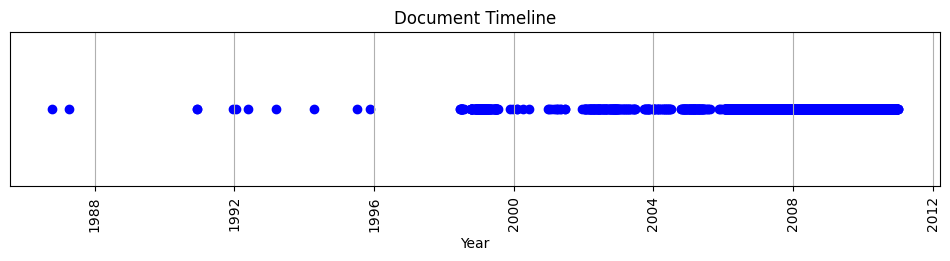

In [200]:
# generalEDA
generalEDA(radioteca_df_complete, "Radioteca.cat")

### 2.5 Complete dataframe

Some of the data frames come with a great amount of metadata that won't be necessary for our research purposes. To keep it we will maintain the separate dataframes and create a merged one extracting only the columns necessary for our research question. That will be the title, date and text/content. We will also create other columns that will be useful for our Exploratory Data Analysis. 

In [209]:
# creating a reduced dataframe with only the date info, title of the file and content/text columns
reduced_CTILC = CTILC_df.filter(["Year", "Title", "Text"])
reduced_parlament_parla = over1000_parlparl_df.filter(["Path", "Sentence"])
reduced_parlamint = over1000_parlaMint.filter(["Date", "Title", "Text"])
reduced_radioteca = radioteca_df_1000.filter(["Year", "Line_id", "Text"])

# adding a Source Corpora column to keep the data
reduced_CTILC["Source_corpora"] = "CTILC"
reduced_parlament_parla["Source_corpora"] = "Parlament Parla"
reduced_parlamint["Source_corpora"] = "ParlaMint"
reduced_radioteca["Source_corpora"] = "Radioteca.cat"
print()
reduced_radioteca.head()

,Year,Line_id,Text,Source_corpora
0,2010.0,Veu B00:00:00,"Guillem Sanz, l'home més a televisió de l'equi...",Radioteca.cat
1,2010.0,Veu A00:00:13,"Molt bé, molt bé.\nEstaran i acabaran.",Radioteca.cat
2,2010.0,Veu B00:00:15,"Això te n'anava a dir.\nI últim dia de l'any, ...",Radioteca.cat
3,2010.0,Veu A00:00:18,"Repassar... Sí, una mica de resum.\nQuè et sem...",Radioteca.cat
4,2010.0,Veu B00:00:20,"És original, això.\nM'agrada.",Radioteca.cat


In [210]:
reduced_parlament_parla.head()

,Path,Source_corpora
0,clean_train/3/1/31ca4d158eaef166c37a_18.87_23....,Parlament Parla
1,clean_train/3/1/31ca4d158eaef166c37a_60.13_65....,Parlament Parla
2,clean_train/2/8/2803008bb00cb0c86de6_17.0_30.1...,Parlament Parla
3,clean_train/2/8/2803008bb00cb0c86de6_31.03_44....,Parlament Parla
4,clean_train/2/8/2803008bb00cb0c86de6_44.74_53....,Parlament Parla


There is no date metadata provided for the parlament parla dataframe.\
For our purposes, as we need a date we will make an aproximation based off the data given by the owners.\
As Parlament Parla is presented as a corpora containing data from 2007 to 2015 we will assign the date aproximation 2010 to all the data in the Parlament Parla dataframe.\
We will also only keep the year infomation as the date in the corpora parlamint where the full (month, day, year) information was provided.

In [211]:
# adding 2010 date to parlament parla rows
reduced_parlament_parla["Year"] = 2010

# keeping only the year on parlaMint
reduced_parlamint["Date"] = reduced_parlamint["Date"].apply(lambda x :x[0:4])

In [212]:
reduced_parlament_parla

,Path,Source_corpora,Year
0,clean_train/3/1/31ca4d158eaef166c37a_18.87_23....,Parlament Parla,2010
1,clean_train/3/1/31ca4d158eaef166c37a_60.13_65....,Parlament Parla,2010
2,clean_train/2/8/2803008bb00cb0c86de6_17.0_30.1...,Parlament Parla,2010
3,clean_train/2/8/2803008bb00cb0c86de6_31.03_44....,Parlament Parla,2010
4,clean_train/2/8/2803008bb00cb0c86de6_44.74_53....,Parlament Parla,2010
...,...,...,...
1835,other_test/0/3/03254e883ae467390949_16.86_22.6...,Parlament Parla,2010
1836,other_test/0/3/03254e883ae467390949_40.08_51.8...,Parlament Parla,2010
1837,other_test/0/3/03254e883ae467390949_80.95_90.7...,Parlament Parla,2010
1838,other_test/0/3/03254e883ae467390949_115.07_120...,Parlament Parla,2010


In [213]:
# adjusting columns to match before concatenating
reduced_parlament_parla = reduced_parlament_parla.rename(columns ={"Year":"Year", "Path":"Title", "Sentence":"Text", "Source_corpora":"Source_corpora"})
reduced_parlamint = reduced_parlamint.rename(columns ={"Date":"Year", "Title":"Title", "Text":"Text", "Source_corpora":"Source_corpora"})
reduced_radioteca = reduced_radioteca.rename(columns ={"Year":"Year", "Line_id":"Title", "Text":"Text", "Source_corpora":"Source_corpora"})

In [214]:
# concatenating all datasets' relevant columns in a single data frame
joined_data = pd.concat([reduced_CTILC, reduced_parlament_parla, reduced_parlamint, reduced_radioteca]) 

In [215]:
joined_data.head()

,Year,Title,Text,Source_corpora
0,1926,Discurs llegit per... donar a conèxer la perso...,"L'home que per amor al estudi, impulsat per un...",CTILC
1,1920,Parlament llegit en la festa inaugural de l'Or...,"Cantaires de la Garriga, Senyores i senyors:\n...",CTILC
2,1900,Discurs-pròlec,Discurs-prolec Llegit en la societat mèdic-far...,CTILC
3,1894,Discurs,"Senyors excelentissims, senyors:\n\nQuan rebí ...",CTILC
4,1903,Discurs,"Senyors:\n\nSembla que era air, y fa ja uns qu...",CTILC


In [216]:
joined_data = joined_data.dropna()

In [217]:
# sorting joined data by year, from oldest to most recent
joined_data["Year"] = joined_data["Year"].apply(lambda x : int(x))
joined_data.sort_values(["Year"])

,Year,Title,Text,Source_corpora
27,1860,Discurs,"Breu seré, cuant ja se han complagut vostres o...",CTILC
23,1868,Discurs,Excel·lentissim senyor:\n\nA últims del segle ...,CTILC
26,1873,Discurs pronunciat en la sessió inaugural que ...,Senyors:\n\nDever meu es avuy 'l dirigirvos la...,CTILC
25,1876,Teatre catalá,Sempre es estada tal la seua manera de reprodu...,CTILC
18,1878,Discurs llegit en la festa de repartició de pr...,Mes aixís com lo mateix soldat s' anima y enco...,CTILC
...,...,...,...,...
39352,2021,"Corpus Parlamentari en català ParlaMint-ES-CT,...",L'article 90 possibilita als diputats poder fe...,ParlaMint
39297,2021,"Corpus Parlamentari en català ParlaMint-ES-CT,...",...i es nega a sentir l'opinió del nostre grup...,ParlaMint
39875,2021,"Corpus Parlamentari en català ParlaMint-ES-CT,...","Bé, primer, en primer lloc, voldria començar, ...",ParlaMint
39354,2021,"Corpus Parlamentari en català ParlaMint-ES-CT,...",Per al·lusions del 87...,ParlaMint


In [218]:
joined_data.reset_index()

,index,Year,Title,Text,Source_corpora
0,0,1926,Discurs llegit per... donar a conèxer la perso...,"L'home que per amor al estudi, impulsat per un...",CTILC
1,1,1920,Parlament llegit en la festa inaugural de l'Or...,"Cantaires de la Garriga, Senyores i senyors:\n...",CTILC
2,2,1900,Discurs-pròlec,Discurs-prolec Llegit en la societat mèdic-far...,CTILC
3,3,1894,Discurs,"Senyors excelentissims, senyors:\n\nQuan rebí ...",CTILC
4,4,1903,Discurs,"Senyors:\n\nSembla que era air, y fa ja uns qu...",CTILC
...,...,...,...,...,...
221592,966362,1986,Veu K00:06:01,"No le puedo decir más.\nLos coches dicen, al p...",Radioteca.cat
221593,966363,1986,Veu E00:06:19,Yo pasaba con todo esto.\nYo venía... Yo me lo...,Radioteca.cat
221594,966364,1986,Veu I00:06:25,¿Ha visto algo usted o algo?,Radioteca.cat
221595,966365,1986,Veu E00:06:26,Yo no me enteré de nada.\nVi mucho... Yo me es...,Radioteca.cat


In [219]:
# creating a length, in tokens, columnm
joined_data["Length"] = joined_data["Text"].apply(str)
joined_data["Length"] = joined_data["Length"].apply(len)

#### Exploratory Data Analysis 

In [220]:
#creating a dictionary of the cumulative amount of tokens per year
year_length = {}

# setting year as the index of the dataframe
joined_data = joined_data.set_index("Year")

# iterating over the rows 
for year, row in joined_data.iterrows():
    if year not in year_length:
        year_length[year] = row["Length"]  # initializing year's length total
    else:
        year_length[year] += row["Length"]  # accumulating length to already present year

In [221]:
year_length = dict(sorted(year_length.items(), key=lambda item: item[1]))
for key in year_length.keys():
    value = year_length[key]
    print(key, "-", value)

2022 - 102
2019 - 262
2017 - 294
1994 - 602
2020 - 756
1987 - 1628
1990 - 1754
1993 - 2027
2000 - 2428
2015 - 2469
1992 - 3148
2018 - 3983
1986 - 4430
1995 - 4533
2021 - 4730
2016 - 7348
1886 - 9178
1920 - 9253
1860 - 9551
1998 - 11971
1885 - 13543
1906 - 14899
1887 - 15147
1879 - 15853
1868 - 18618
1905 - 19662
1881 - 20069
1909 - 20656
1884 - 21728
1890 - 26544
1903 - 26577
2003 - 27553
1894 - 29393
1907 - 31790
1891 - 33265
1999 - 35718
1883 - 36217
1873 - 36899
1926 - 37497
1889 - 38448
1878 - 39900
2001 - 41140
2002 - 56471
1899 - 61063
1876 - 62307
2004 - 63184
1900 - 73881
2005 - 96253
2007 - 3078657
2006 - 3438329
2008 - 5549030
2009 - 7791196
2010 - 12670940


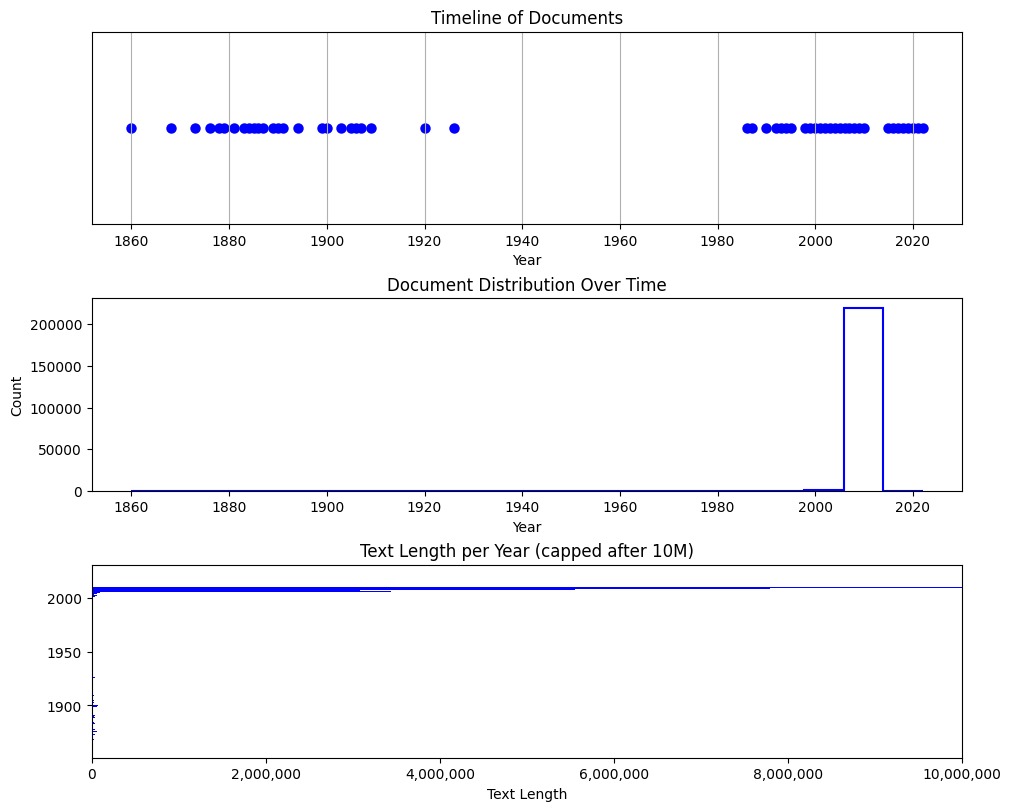

In [222]:
import matplotlib.ticker as ticker  

# placeholder y-values for timeline
years = list(year_length.keys())  
y_values = np.ones(len(years)) 

# creating mosaic layout for our multiple plots
fig, ax = plt.subplot_mosaic([["B", "B"],  # Timeline
                              ["A", "A"],  # Histogram
                              ["D", "D"]],  # Text count & corpus length
                             figsize=(10, 8),
                             constrained_layout=True)

# (A) Histogram of Document Distribution Over Time
ax['A'].hist(joined_data.index, bins=min(20, len(years)), histtype='step', color="blue", lw=1.5)
ax['A'].set_title("Document Distribution Over Time")
ax['A'].set_xlabel("Year")
ax['A'].set_ylabel("Count")

# (B) Timeline (Scatter Plot)
ax['B'].scatter(years, y_values, color="blue", marker="o", lw=1.5)
ax['B'].set_title("Timeline of Documents")
ax['B'].set_xlabel("Year")
ax['B'].set_yticks([])  # Remove y-axis labels since they are not meaningful
ax['B'].grid(axis="x")

# (D) Text length per year in token counts
capped_values = [min(val, 10_000_000) for val in year_length.values()]  # limit to 10M

ax['D'].barh(list(year_length.keys()), capped_values, color="blue")
ax['D'].set_title("Text Length per Year (capped after 10M)")  
ax['D'].set_xlabel("Text Length")  

# Fix Tick Labels (Without `ticker`)
x_ticks = ax['D'].get_xticks()  
ax['D'].set_xticks(x_ticks)  
ax['D'].set_xticklabels([f"{int(x):,}" for x in x_ticks])  
ax["D"].set_xlim(0, 10_000_000)

# displaying the plots' mosaic
plt.show()

## Conclusions on the resulting data:
Currently, there are some issues that we can see on the plots and through the exploratory data analysis of all individual data frames, including the complete one. We will need to find a solution to these or work around them by considering the caveats it might extend to and being aware of the following points when drawing conclusions.\
First, there is a considerable gap between the data after the last CTILC file (from X) and the following Y. We can spot this in the Timeline of Documents plot, where the data points are on both ends, leaving a gap from around X to Y.  
Secondly, there is a big difference in token amount between the older data from the early 1900s and before and the most recent data from 2010-2022. It can be observed in the Document Distribution over Time and Text Length per Year plots. In this second, the number of tokens had to be capped at 10M, highlighting this issue partly due to another problem. The Palament Parla data does not have a specific date, which spikes the amount of data in 2010 after the approximation, which we will need to be mindful of in the following steps.

### Changes on the Data Frame posterior to the analysis

To even out the data. We are going to drop some of it.

**Aproach 1:**\
Aiming for the most unbiased and representative data, we will first drop individual Speaker's contributions if they are over 1500 characters long for the ParlaMint, Parlament Parla and Radioteca data, which is about 200 words. This will allow for a less speaker-specific analysis. 

In [ ]:
## Radioteca

In [ ]:
# starting chop off by speaker
over2000_radioteca = radioteca_df_complete.groupby(["Episode", "Speaker"])["Text_len"].sum()>2000
over2000_radioteca.value_counts()

In [ ]:
# Parlamint

In [ ]:
# cutting down speakers contribution if they are over 2000 length
over2000_parlaMint = parlaMint_df.groupby("Speaker_name")["Text_len"].sum()>2000
over2000_parlaMint.value_counts()

In [ ]:
# ParlamentParla

In [ ]:
# chopping off by speaker
# cutting down speakers contribution if they are over 2000 length
over2000_parlament_parla = parlament_parla_df.groupby("Speaker_id")["Text_len"].sum()>2000
over2000_parlament_parla.value_counts()

In [240]:
def under1500(dataframe, contrivutorColName):
    '''
    takes in a dataframe
    after the cumulative text length of one speaker goes over 1500 characters
    the following contributions are no longer added to the dataframe
    ensuring a max of 1500 characters per speaker/contrivutor
    '''
    if contrivutorColName == "Speaker":
        dataframe["CUMSUM_len"] = dataframe.groupby(["Episode", contrivutorColName])["Text_len"].cumsum()
    else:
        dataframe["CUMSUM_len"] = dataframe.groupby(contrivutorColName)["Text_len"].cumsum()
    max1500_df = dataframe[dataframe["CUMSUM_len"] <= 1500]
    speaker_grouped = max1500_df.groupby(contrivutorColName)["Text_len"].sum()

    #printing contribution max and min to ensure the process worked out well
    print("The token count for the speaker contrbuting with the most amount of data is", speaker_grouped.max())
    print("The token count for the speaker contrbuting with the least amount of data is", speaker_grouped.min())

    return max1500_df

In [241]:
under1500_parlparl_df = under1500(parlament_parla_df, "Speaker_id")
print()
under1500_parlaMint_df = under1500(parlaMint_df, "Speaker_name")
print()
under1500_radioteca_df = under1500(radioteca_df_complete, "Speaker")

The token count for the speaker contrbuting with the most amount of data is 1500
The token count for the speaker contrbuting with the least amount of data is 97

The token count for the speaker contrbuting with the most amount of data is 1498
The token count for the speaker contrbuting with the least amount of data is 3

The token count for the speaker contrbuting with the most amount of data is 11193934
The token count for the speaker contrbuting with the least amount of data is 14400
